# #0: First thing first: always run this command to clear memory

In [1]:
%reset -f

# #1: import all packages we need

## in this course, we only use these packages (all preinstalled in Anaconda3)
### * numpy and scipy for math computation
### * pandas for data manipulation
### * matplotlib and seaborn to plot figures
### * scikit-learn and statsmodels for statistical computation

In [2]:
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import statsmodels.api   as sm
import seaborn           as sns

# #2: prepare data from online website with Pandas

## #2a: load data from online website and save it as a table

In [3]:
prostata_table = pd.read_csv('https://web.stanford.edu/~hastie/ElemStatLearn/datasets/prostate.data', sep=None)

/home/ning/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


### Prostate data info:

#### Predictors: lcavol lweight age lbph svi lcp gleason pgg45 (metrics in Medical tests)
#### Outcome: lpsa (higher this metric, more likely prostate cancer)

## #2b: check the table

In [4]:
prostata_table.head()

,Unnamed: 0,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
0,1,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783,T
1,2,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519,T
2,3,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519,T
3,4,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519,T
4,5,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564,T


## #2c: drop any variable you don't want from the table

In [5]:
prostata_table = prostata_table.drop('Unnamed: 0',axis=1)

## #2d: compute correlation matrix of variables

In [6]:
prostata_table.corr(method='pearson')

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
lcavol,1.000000,0.280521,0.225000,0.027350,0.538845,0.675310,0.432417,0.433652,0.734460
lweight,0.280521,1.000000,0.347969,0.442264,0.155385,0.164537,0.056882,0.107354,0.433319
age,0.225000,0.347969,1.000000,0.350186,0.117658,0.127668,0.268892,0.276112,0.169593
lbph,0.027350,0.442264,0.350186,1.000000,-0.085843,-0.006999,0.077820,0.078460,0.179809
svi,0.538845,0.155385,0.117658,-0.085843,1.000000,0.673111,0.320412,0.457648,0.566218
lcp,0.675310,0.164537,0.127668,-0.006999,0.673111,1.000000,0.514830,0.631528,0.548813
gleason,0.432417,0.056882,0.268892,0.077820,0.320412,0.514830,1.000000,0.751905,0.368987
pgg45,0.433652,0.107354,0.276112,0.078460,0.457648,0.631528,0.751905,1.000000,0.422316
lpsa,0.734460,0.433319,0.169593,0.179809,0.566218,0.548813,0.368987,0.422316,1.000000


## #2f: compute covariance matrix of variables

In [7]:
prostata_table.cov()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
lcavol,1.389157,0.141645,1.974374,0.046767,0.262927,1.112920,0.368041,14.415458,0.999249
lweight,0.141645,0.183536,1.109872,0.274886,0.027559,0.098562,0.017598,1.297148,0.214288
age,1.974374,1.109872,55.429768,3.782507,0.362650,1.329038,1.445662,57.978737,1.457500
lbph,0.046767,0.274886,3.782507,2.104840,-0.051560,-0.014199,0.081531,3.210474,0.301128
svi,0.262927,0.027559,0.362650,-0.051560,0.171392,0.389643,0.095790,5.343643,0.270588
lcp,1.112920,0.098562,1.329038,-0.014199,0.389643,1.955102,0.519836,24.905125,0.885807
gleason,0.368041,0.017598,1.445662,0.081531,0.095790,0.519836,0.521478,15.314111,0.307580
pgg45,14.415458,1.297148,57.978737,3.210474,5.343643,24.905125,15.314111,795.467569,13.749226
lpsa,0.999249,0.214288,1.457500,0.301128,0.270588,0.885807,0.307580,13.749226,1.332476


## #2e: plot the joint and marginal distributions of selected variables

### Plot the marginal and joint distribution of two variables together

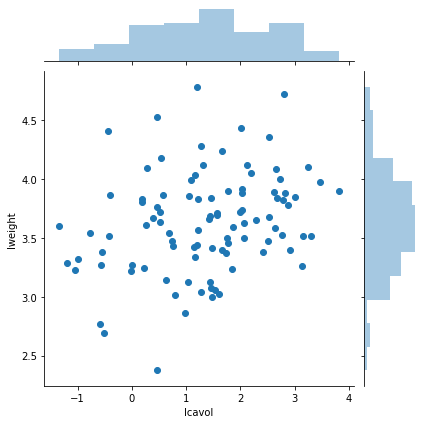

In [8]:
sns.jointplot(x="lcavol", y="lweight", data=prostata_table)

# #3: Univariate regression with Statsmodel

## #3a: select which variable is X and which is Y

### alway remember to use "add_constant" to make sure you have intercept in regression equation

In [9]:
X_one = prostata_table[['lcavol']]
X_one = sm.add_constant(X_one)
Y_one = prostata_table[['lpsa']]

## #3b: compute regression, report the summary table and compute predicted value of Y

In [10]:
reg1 = sm.OLS(Y_one, X_one)

result1 = reg1.fit()
print(result1.summary())

Y_pred_one = result1.predict()
Y_pred_one.shape = (97,1)

                            OLS Regression Results                            
Dep. Variable:                   lpsa   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                     111.3
Date:                Mon, 24 Aug 2020   Prob (F-statistic):           1.12e-17
Time:                        16:36:43   Log-Likelihood:                -113.45
No. Observations:                  97   AIC:                             230.9
Df Residuals:                      95   BIC:                             236.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5073      0.122     12.361      0.0

### if you want to see the result one by one

In [11]:
print('Parameters: ', result1.params)
print('Standard errors of regression coefficents: ', result1.bse)
print('R2: ', result1.rsquared)

Parameters:  const     1.507297
lcavol    0.719320
dtype: float64
Standard errors of regression coefficents:  const     0.121937
lcavol    0.068193
dtype: float64
R2:  0.5394319707818951


## #3c: compute t-test on your regression result

### T-test if intercept is 0 in population

In [12]:
print(result1.t_test(["const = 0"]))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             1.5073      0.122     12.361      0.000       1.265       1.749


### T-test if the regression coeffcient of "lcavol" is 0 in population

In [13]:
print(result1.t_test(["lcavol = 0"]))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.7193      0.068     10.548      0.000       0.584       0.855


## #3d: plot the regression line and data points

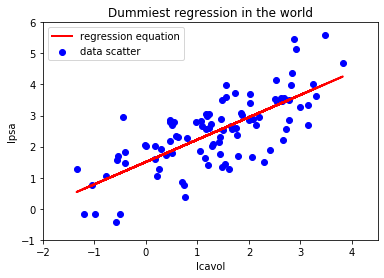

In [15]:
fig1 = plt.figure()

plt.scatter(X_one['lcavol'], Y_one, label='data scatter', color='blue')
plt.plot(X_one['lcavol'], Y_pred_one, label='regression equation', color='red', linewidth=2.0,)

plt.xlabel('lcavol')
plt.ylabel('lpsa')
plt.title('Dummiest regression in the world')

plt.legend()

plt.xlim(-2,4.5)
plt.ylim(-1,6)

plt.show()

# #4: Multivariate regression with Statsmodel

## #4a: choose which variable is in X and which variable is Y
### alway remeber to use "add_constant" to make sure you have intercept in your regression equation

In [16]:
X = prostata_table[['lcavol','lweight','age','lbph','svi','lcp','gleason','pgg45']]
X = sm.add_constant(X)
Y = prostata_table[['lpsa']]

## #4b: compute regression and report the result

In [17]:
reg = sm.OLS(Y, X)

result = reg.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   lpsa   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     21.68
Date:                Mon, 24 Aug 2020   Prob (F-statistic):           7.65e-18
Time:                        16:37:05   Log-Likelihood:                -98.248
No. Observations:                  97   AIC:                             214.5
Df Residuals:                      88   BIC:                             237.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1816      1.321      0.137      0.8

### if you want to see the result one by one

In [18]:
print('Parameters: ', result.params)
print('Standard errors: ', result.bse)
print('R2: ', result.rsquared)

Parameters:  const      0.181561
lcavol     0.564341
lweight    0.622020
age       -0.021248
lbph       0.096713
svi        0.761673
lcp       -0.106051
gleason    0.049228
pgg45      0.004458
dtype: float64
Standard errors:  const      1.320568
lcavol     0.087833
lweight    0.200897
age        0.011084
lbph       0.057913
svi        0.241176
lcp        0.089868
gleason    0.155341
pgg45      0.004365
dtype: float64
R2:  0.6633895654989246


## #4c: T-test on regression model

### T-test on $H_0 : \beta_{lcavol} = 0$

In [19]:
print(result.t_test("lcavol = 1"))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.5643      0.088     -4.960      0.000       0.390       0.739


### T-test on $H_0 : \beta_{lcavol} = 1$

In [20]:
print(result.f_test(["lcavol = 1"]))

<F test: F=array([[24.60214109]]), p=3.4048449062449285e-06, df_denom=88, df_num=1>


### Perform two T-tests 
### First one  : $H_0 : \beta_{lcavol} = 100$
### Second one : $H_0 : \beta_{lweight} = 500$

In [21]:
print(result.t_test(["lcavol = 100","lweight = 500"]))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.5643      0.088  -1132.093      0.000       0.390       0.739
c1             0.6220      0.201  -2485.746      0.000       0.223       1.021


## #4d: F-test on regression model

### F-test on $H_0 : \beta_{lcavol} = \beta_{lweight} =1$

In [22]:
print(result.f_test("lcavol = lweight = 1"))

<F test: F=array([[16.76028865]]), p=6.802136120429648e-07, df_denom=88, df_num=2>


### F-test on $H_0 : \beta_{lcavol} = 1 \mbox{ and } \beta_{lweight} = 3$

In [23]:
print(result.f_test(["lcavol = 1", "lweight = 3"]))

<F test: F=array([[98.99237548]]), p=3.0071216760314156e-23, df_denom=88, df_num=2>
